# Data exploration, Data preparation and  Data Visualization before Machine Learning

In this tutorial we will take a sample dataset, explore the data, process the data to make it ready for machine learning. Finally, we will also visualize the features and properties of the dataset.

After this tutorial you will learn
1. How to import external data to pandas
2. The standard way in Python to explore the different properties of the dataset
3. How to convert categorical values to numeric values in python
4. Strategy for selecting and removing attributes from dataset to make it machine learning ready
5. Different ways to visualize the data


Let's start

The data that we use here is from the well known databank for Machine Learning at UCI,California. The link to the data is given below
source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Description of the different attributes in the dataset:

Basic information

1- age (numeric)
2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5 - default: has credit in default? (categorical: "no","yes","unknown")
6 - housing: has housing loan? (categorical: "no","yes","unknown")
7 - loan: has personal loan? (categorical: "no","yes","unknown")


Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: "cellular","telephone") 
9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [209]:
#Importing necessary modules/libraries
#for data import and processing
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder \
                                    ,StandardScaler #for standardizing data
le=LabelEncoder() # Converting categorical to Numeric
# for plotting
import matplotlib.pyplot as plt 
plt.rc("font", size = 14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
%matplotlib inline

In [210]:
#import the data
df = pd.read_csv('datascience/import_data/bank-additional-full.csv', delimiter=';' )
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Let's explore the data. Let's anaylze some of the attributes in the data and see the distribution

In [211]:
#Are there data in all columns?
df.info()
#Are there null values in any column?
df.isnull().sum() # you can also use # df.isnull().values.any() if you need just a boolean value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We can see the following features here:

    Looks like there are no null columns and no null values in any column
    
    There are both categorical and numerical values

    There are both integers as well as float values

    The target variable is categorical. 
    
For most Machine Learning algorithms, we cannot work with categorical values. Hence it need to be converted into numeric - need to map to a numeric value.

In [212]:
#Get the max, min, mode, etc values 
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


As we can see in the data description, 999 means client was not previously contacted (see data description). It  is ok. Now we know the reason.

    The duration column also need to be removed for a good predictive model, according to th data discription.

    You can also note that describe command showed only the numeric columns. 

We need to fix the above issues.



In [213]:
#drop the undesired column
data = df.drop(["duration"], axis =1)# axis shows it is a column and row

#Convert categorical to numeric using le transform
for col in data.columns.values:
     if data[col].dtypes=="object":
        le.fit(data[col].values)
        data[col]=le.transform(data[col])


Now let's do the checks one more time if the above data processing fixed all issues


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(15)
memory usage: 6.3 MB


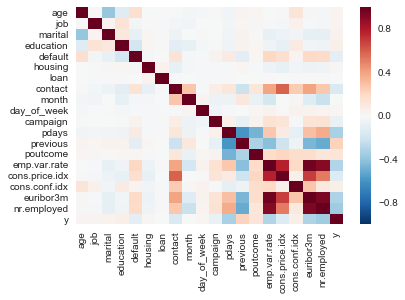

In [214]:
#Are all categorical values converted to numeric
#is the duration column removed?
data.info()

#Are there dependencies between independent attributes

corr=data.corr(method="pearson")
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)
sns.plt.show()

We can see that three columns are highly correlated. euribor3m, emp.var.rate, nr.employed
Let's see the actual values of the correlation matrix to see the extend of correlation

In [215]:
print(corr["emp.var.rate"])


age              -0.000371
job              -0.008271
marital          -0.084210
education        -0.043778
default           0.203263
housing          -0.060196
loan              0.001849
contact           0.393584
month            -0.178782
day_of_week       0.033245
campaign          0.150754
pdays             0.271004
previous         -0.420489
poutcome          0.192972
emp.var.rate      1.000000
cons.price.idx    0.775334
cons.conf.idx     0.196041
euribor3m         0.972245
nr.employed       0.906970
y                -0.298334
Name: emp.var.rate, dtype: float64


In [216]:
print(corr["euribor3m"])

age               0.010767
job              -0.007880
marital          -0.091939
education        -0.036380
default           0.195336
housing          -0.059277
loan              0.000125
contact           0.399773
month            -0.117264
day_of_week       0.039043
campaign          0.135133
pdays             0.296899
previous         -0.454494
poutcome          0.184144
emp.var.rate      0.972245
cons.price.idx    0.688230
cons.conf.idx     0.277686
euribor3m         1.000000
nr.employed       0.945154
y                -0.307771
Name: euribor3m, dtype: float64


We can see that the column emp.var.rate is highly correlated (>0.95) with euribor3m and vis-verse and also correlated with nr.employed to a high value (>0.9). Let's first remove these attributes and see the correlations

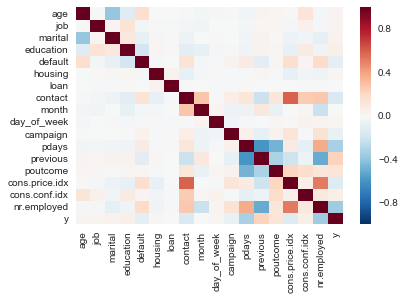

In [217]:
data2 = data.drop(["emp.var.rate","euribor3m" ], axis =1)# axis shows it is a column and row

corr=data2.corr(method="pearson")
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)
sns.plt.show()

Now we have a clean set of attributes.

We did the following steps in the above data preparation steps:

1. Converted categorical to numeric values

2. Removed attributes that are highly correlated with label column ("duration")

3. Removed attributes that are highly correlated with each other. 

4. We also did a check if there are null values. Since we did not have any, we did not do anything.

Let's now plot some of the columns and see how the columns look like:


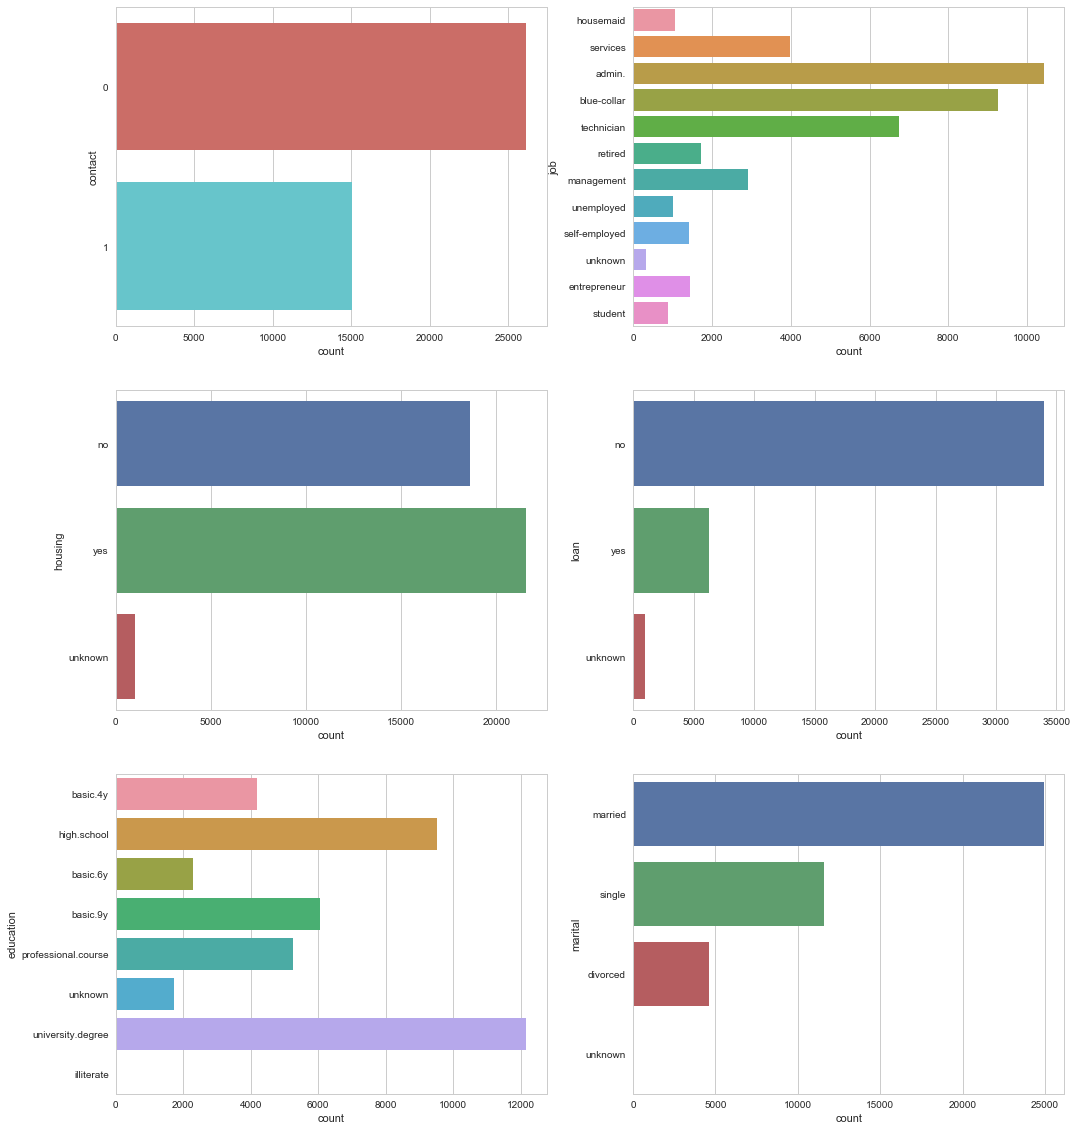

In [218]:
#how does the attribute distribution count look like?
fig = plt.figure(figsize=(17, 20)) # here we set the figure size
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
#target 
sns.countplot(data=data2, y= "contact",  palette ="hls", ax= ax1)
#job
sns.countplot(data=df, y= "job" ,ax = ax2) #note here we changed the exis also note that we took the date before converting categorical

#housing
sns.countplot(data=df, y= "housing" ,ax = ax3) #note here we changed the exis also note that we took the date before converting categorical

#loan
sns.countplot(data=df, y= "loan" ,ax = ax4) #note here we changed the exis also note that we took the date before converting categorical

#housing
sns.countplot(data=df, y= "marital" ,ax = ax6) #note here we changed the exis also note that we took the date before converting categorical

#loan
sns.countplot(data=df, y= "education" ,ax = ax5) #note here we changed the exis also note that we took the date before converting categorical



Here let's see how each variable contributed towards the class variable

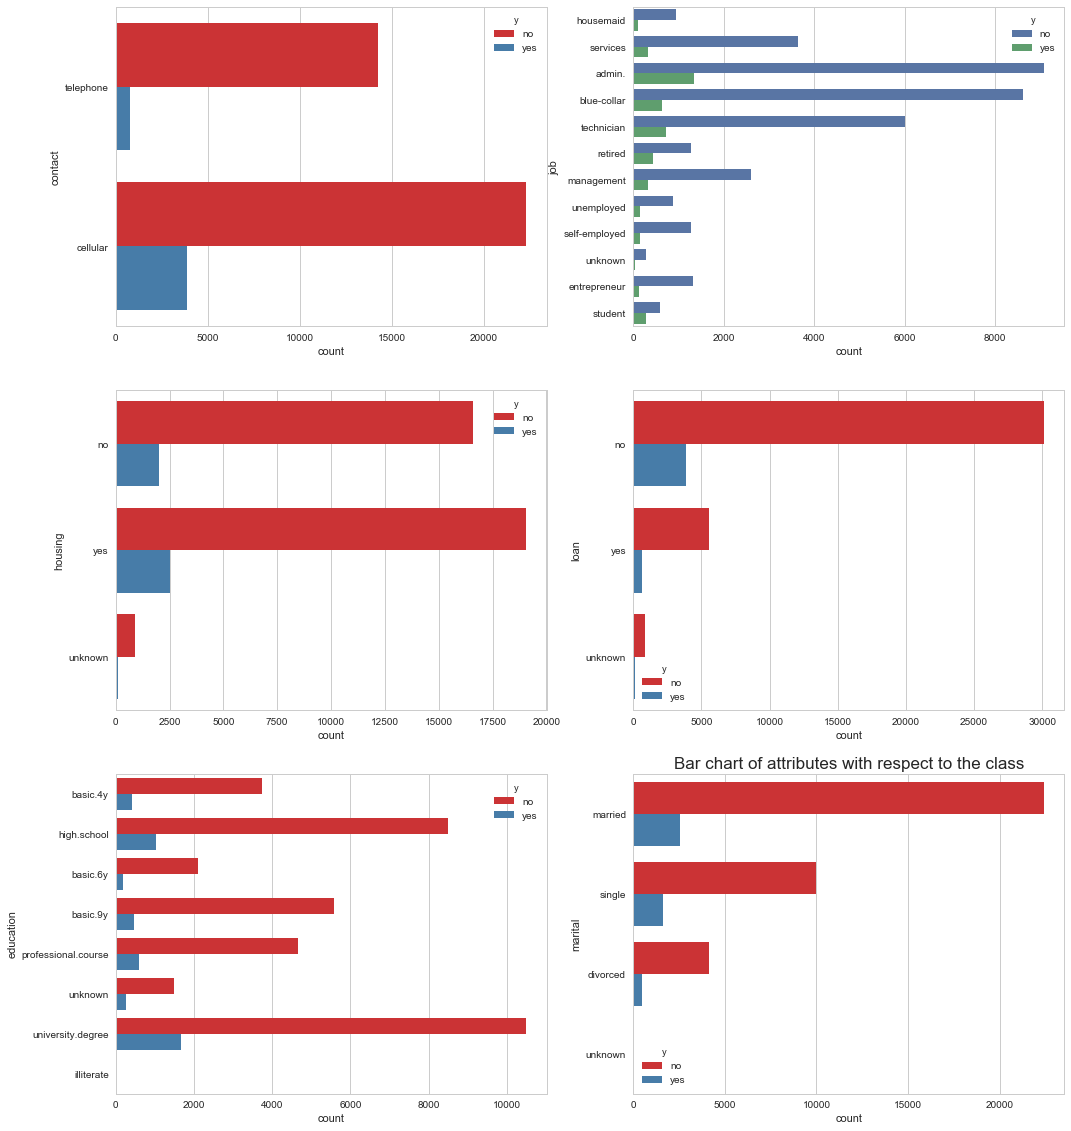

In [219]:
#how does the attribute distribution count look like?
fig = plt.figure(figsize=(17, 20)) # here we set the figure size
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
plt.title("Bar chart of attributes with respect to the class", fontsize=17)
#target 
sns.countplot(data=df, y= "contact",hue='y', palette='Set1', ax= ax1 )
#job
sns.countplot(data=df, y= "job" ,hue='y', ax = ax2) #note here we changed the exis also note that we took the date before converting categorical

#housing
sns.countplot(data=df, y= "housing" ,hue='y', palette='Set1',ax = ax3) #note here we changed the exis also note that we took the date before converting categorical

#loan
sns.countplot(data=df, y= "loan" ,hue='y', palette='Set1',ax = ax4) #note here we changed the exis also note that we took the date before converting categorical

#housing
sns.countplot(data=df, y= "marital" ,hue='y', palette='Set1',ax = ax6) #note here we changed the exis also note that we took the date before converting categorical

#loan
sns.countplot(data=df, y= "education" ,hue='y', palette='Set1',ax = ax5) #note here we changed the exis also note that we took the date before converting categorical



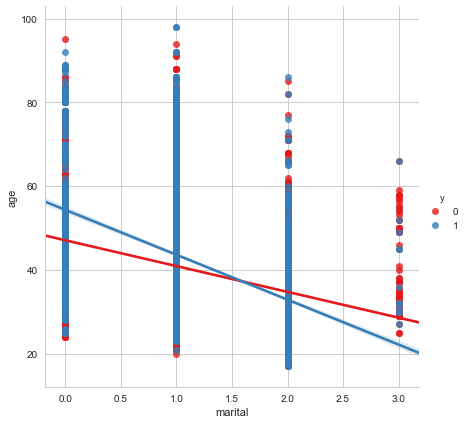

In [220]:
#How are the attributes correlated to each other and with the final class
#Three dimentional plots

plt.figure(figsize=(14,7))
sns.lmplot(y='age',x='marital',data=data2,hue='y',palette='Set1',size=6)

Finally, let's  see the distribution of the class variable.

In [221]:
#How many items are there in each class variable
data2.groupby(list(data2["y"])).size()

0    36548
1     4640
dtype: int64

All looks good except the unbalenced class. Unbalenced class is where one target value is significantly more than other. 

In [222]:
x,y= data2.groupby(list(data2["y"])).size()

print("The event rate of the unbalenced class is  %s%%" % (y/(x+y)*100))


The event rate of the unbalenced class is  11.2654171118%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

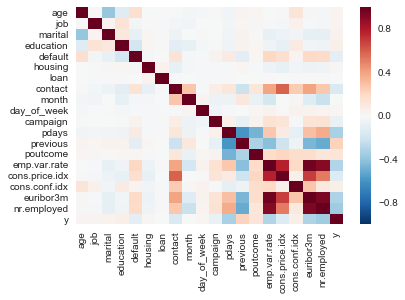

age              -0.000371
job              -0.008271
marital          -0.084210
education        -0.043778
default           0.203263
housing          -0.060196
loan              0.001849
contact           0.393584
month            -0.178782
day_of_week       0.033245
campaign          0.150754
pdays             0.271004
previous         -0.420489
poutcome          0.192972
emp.var.rate      1.000000
cons.price.idx    0.775334
cons.conf.idx     0.196041
euribor3m         0.972245
nr.employed       0.906970
y                -0.298334
Name: emp.var.rate, dtype: float64
age               0.010767
job              -0.007880
marital          -0.091939
education        -0.036380
default           0.195336
housing          -0.059277
loan              0.000125
contact           0.399773
month            -0.117264
day_of_week       0.039043
campaign          0.135133
pdays             0.296899
previous         -0.454494
poutcome          0.184144
emp.var.rate      0.972245
cons.price.idx    0.

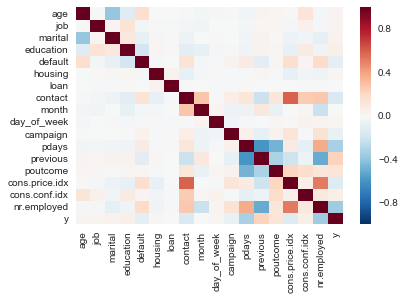

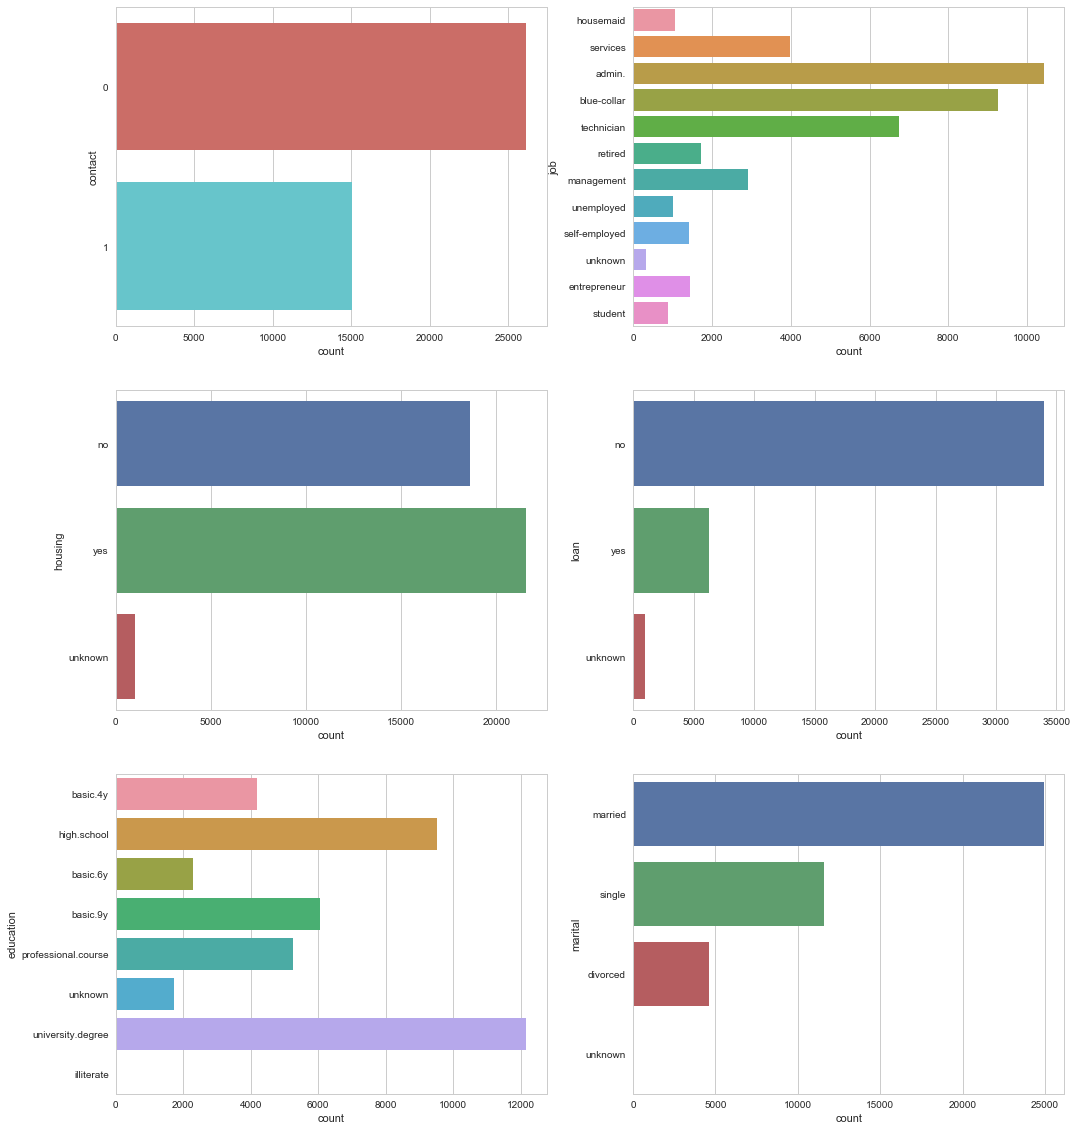

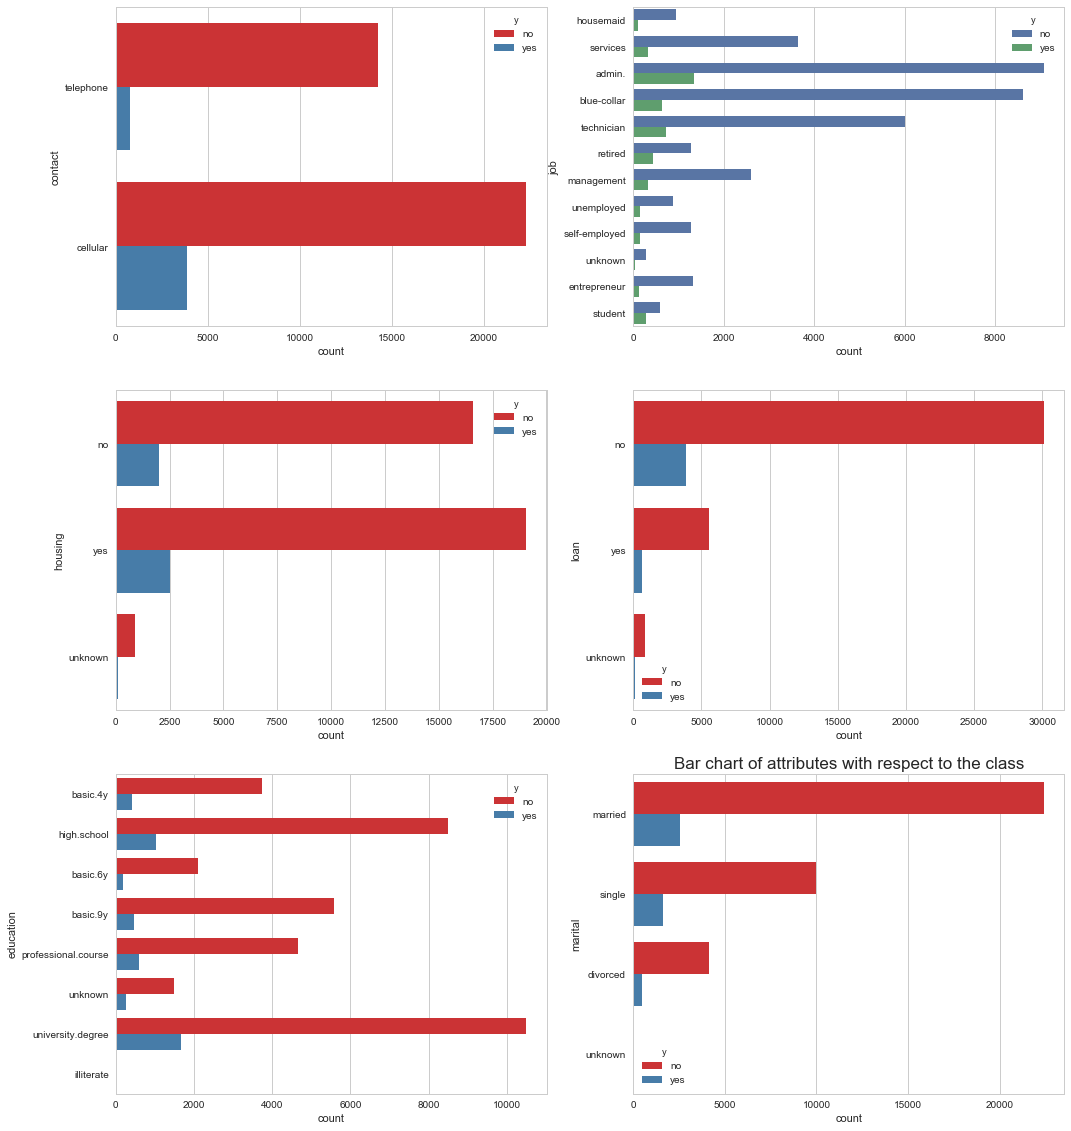

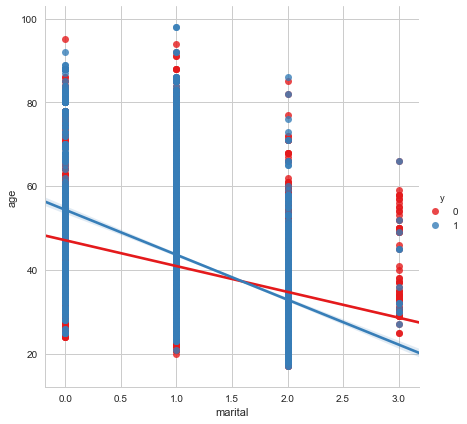

In [223]:
#Importing necessary modules/libraries
#for data import and processing
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder \
                                    ,StandardScaler #for standardizing data
le=LabelEncoder() # Converting categorical to Numeric
# for plotting
import matplotlib.pyplot as plt 
plt.rc("font", size = 14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
%matplotlib inline

#import the data
df = pd.read_csv('datascience/import_data/bank-additional-full.csv', delimiter=';' )
df.head(5)

#Are there data in all columns?
df.info()
#Are there null values in any column?
df.isnull().sum() # you can also use # df.isnull().values.any() if you need just a boolean value

#Get the max, min, mode, etc values 
df.describe()

#drop the undesired column
data = df.drop(["duration"], axis =1)# axis shows it is a column and row

#Convert categorical to numeric using le transform
for col in data.columns.values:
     if data[col].dtypes=="object":
        le.fit(data[col].values)
        data[col]=le.transform(data[col])

        
#Are all categorical values converted to numeric
#is the duration column removed?
data.info()

#Are there dependencies between independent attributes

corr=data.corr(method="pearson")
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)
sns.plt.show()

print(corr["emp.var.rate"])

print(corr["euribor3m"])

data2 = data.drop(["emp.var.rate","euribor3m" ], axis =1)# axis shows it is a column and row

corr=data2.corr(method="pearson")
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)
sns.plt.show()

#how does the attribute distribution count look like?
fig = plt.figure(figsize=(17, 20)) # here we set the figure size
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
#target 
sns.countplot(data=data2, y= "contact",  palette ="hls", ax= ax1)
#job
sns.countplot(data=df, y= "job" ,ax = ax2) #note here we changed the exis also note that we took the date before converting categorical

#housing
sns.countplot(data=df, y= "housing" ,ax = ax3) #note here we changed the exis also note that we took the date before converting categorical

#loan
sns.countplot(data=df, y= "loan" ,ax = ax4) #note here we changed the exis also note that we took the date before converting categorical

#housing
sns.countplot(data=df, y= "marital" ,ax = ax6) #note here we changed the exis also note that we took the date before converting categorical

#loan
sns.countplot(data=df, y= "education" ,ax = ax5) #note here we changed the exis also note that we took the date before converting categorical

plt.show()

#how does the attribute distribution count look like?
fig = plt.figure(figsize=(17, 20)) # here we set the figure size
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
plt.title("Bar chart of attributes with respect to the class", fontsize=17)
#target 
sns.countplot(data=df, y= "contact",hue='y', palette='Set1', ax= ax1 )
#job
sns.countplot(data=df, y= "job" ,hue='y', ax = ax2) #note here we changed the exis also note that we took the date before converting categorical

#housing
sns.countplot(data=df, y= "housing" ,hue='y', palette='Set1',ax = ax3) #note here we changed the exis also note that we took the date before converting categorical

#loan
sns.countplot(data=df, y= "loan" ,hue='y', palette='Set1',ax = ax4) #note here we changed the exis also note that we took the date before converting categorical

#housing
sns.countplot(data=df, y= "marital" ,hue='y', palette='Set1',ax = ax6) #note here we changed the exis also note that we took the date before converting categorical

#loan
sns.countplot(data=df, y= "education" ,hue='y', palette='Set1',ax = ax5) #note here we changed the exis also note that we took the date before converting categorical

plt.show()


#How are the attributes correlated to each other and with the final class
#Three dimentional plots

plt.figure(figsize=(14,7))
sns.lmplot(y='age',x='marital',data=data2,hue='y',palette='Set1',size=6)